<a href="https://colab.research.google.com/github/Tharunakula/TensorFlow-Exercises/blob/main/Train%20MNIST%20Model%20with%20Adam%20%26%20SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


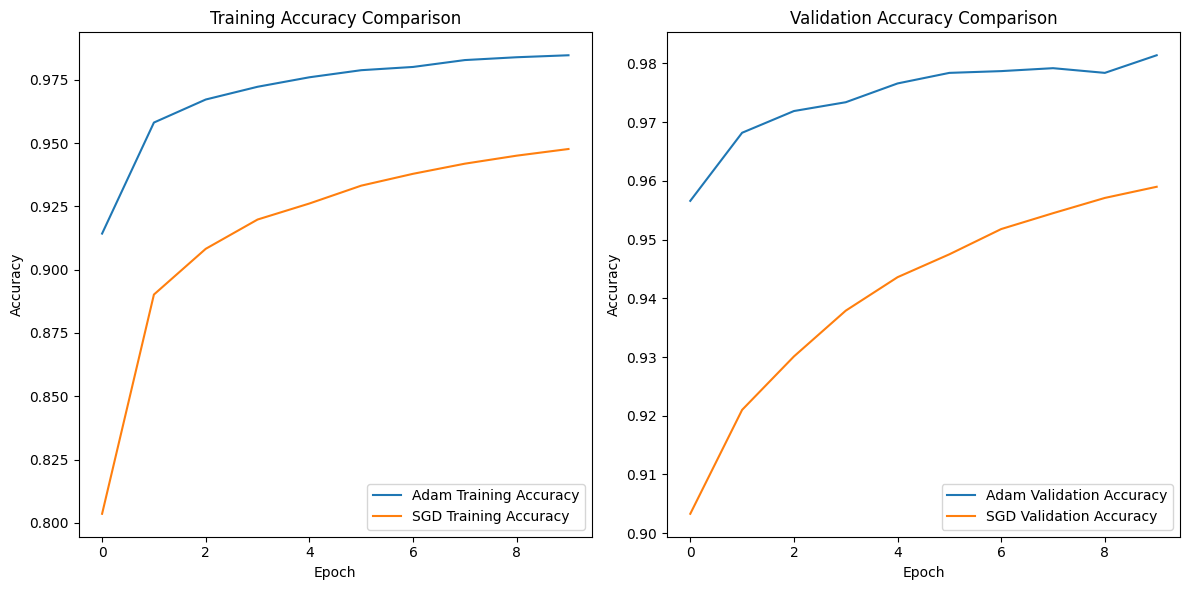

Adam:
Training Accuracy: 0.9847
Validation Accuracy: 0.9814

SGD:
Training Accuracy: 0.9477
Validation Accuracy: 0.9590


In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

# 1. Load the MNIST dataset.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the model architecture (same for both optimizers)
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')  # Output layer with softmax
    ])
    return model


# 2. Train two models: One with Adam and another with SGD.

# Model 1: Adam optimizer
model_adam = create_model()
model_adam.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_adam = model_adam.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=0)  # Reduced verbosity

# Model 2: SGD optimizer
model_sgd = create_model()
model_sgd.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_sgd = model_sgd.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=0) # Reduced verbosity


# 3. Compare training and validation accuracy trends.

# Plotting the accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # Subplot for training accuracy
plt.plot(history_adam.history['accuracy'], label='Adam Training Accuracy')
plt.plot(history_sgd.history['accuracy'], label='SGD Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Comparison')
plt.legend()

plt.subplot(1, 2, 2)  # Subplot for validation accuracy
plt.plot(history_adam.history['val_accuracy'], label='Adam Validation Accuracy')
plt.plot(history_sgd.history['val_accuracy'], label='SGD Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy Comparison')
plt.legend()

plt.tight_layout() # Adjusts subplot params so that subplots fit in to the figure area.
plt.show()



# Print final accuracies (optional)
print("Adam:")
print(f"Training Accuracy: {history_adam.history['accuracy'][-1]:.4f}")
print(f"Validation Accuracy: {history_adam.history['val_accuracy'][-1]:.4f}")

print("\nSGD:")
print(f"Training Accuracy: {history_sgd.history['accuracy'][-1]:.4f}")
print(f"Validation Accuracy: {history_sgd.history['val_accuracy'][-1]:.4f}")